# HELP NGO

## From the given data , point out the countries which are in dire need of financial aid from the NGO

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

## Data Reading and Understanding

In [2]:
# Read data to a dataframe
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**In data dictionary the below mentioned 3 parameters , are presented as a percentage of GDPP**
- **exports**
- **health**
- **imports**

**So we will convert the gdpp percentage values of above parameters to actual values**

In [5]:
df['exports'] = df['gdpp'] * df['exports'] * 100
df['health']  = df['gdpp'] * df['health'] * 100
df['imports'] = df['gdpp'] * df['imports'] * 100

In [6]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,553000.0,419174.0,2482970.0,1610,9.44,56.2,5.82,553
1,Albania,16.6,11452000.0,2678950.0,19877400.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,17126400.0,1859820.0,14004400.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,21991900.0,1006050.0,15143700.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,55510000.0,7356600.0,71858000.0,19100,1.44,76.8,2.13,12200


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,1.670000e+02,1.670000e+02,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7.420619e+07,1.056733e+07,6.588352e+07,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,1.797389e+08,1.801409e+07,1.471081e+08,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920e+04,1.282120e+05,6.510920e+03,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,4.471400e+06,7.853550e+05,6.402150e+06,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1.777440e+07,3.218860e+06,2.045580e+07,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7.278000e+07,9.769400e+06,7.719600e+07,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,1.837500e+09,8.663600e+07,1.491000e+09,125000.000000,104.000000,82.800000,7.490000,105000.000000


**Check for the null values**

In [8]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no null values in the given data

## Data Visulaization

In [9]:
# We will recongnise the top 5 countries with respect to all the provided categories Since we are checking which countries 
# need aid so we will sort the values in that aspect.

#If a country has high child mortality and fertility rate then it might need help so sorted descendingly to select 
# top 5 countries with high  child mortality and fertility rate
country_child_mort = df[['country','child_mort']].sort_values('child_mort' , ascending = False).head(5) 
country_total_fer = df[['country','total_fer']].sort_values('total_fer' , ascending = False).head(5)


#If the country's  export and import services and income is low then the country might need aid , so sorted ascendingly
# to select top 5 countries with low export , import and income
country_exports = df[['country','exports']].sort_values('exports' , ascending = True).head(5)
country_imports = df[['country','imports']].sort_values('imports' , ascending = True).head(5)
country_income = df[['country','income']].sort_values('income' , ascending = True).head(5)


# if the country is spending less on health budget it might need help so sorted ascendingly to select top 5
# countries with low hospital budget
country_health = df[['country','health']].sort_values('health' , ascending = True).head(5)


# If the measure of rate of rising prices of the goods in a country is high in such cases it might need financial aid
# so sorted descendingly to select top 5 countries with high inflation
country_inflation = df[['country','inflation']].sort_values('inflation' , ascending = False).head(5)


# If the life expectancy in a country is low , the teh living conditions , other facilities prompting to high life expectancy
# might be less in the country so sorted ascendingly to select top 5 countries with low life expectany
country_life_expec = df[['country','life_expec']].sort_values('life_expec' , ascending = True).head(5)


# if the country gdpp is low it will need help , so sorted ascendingly to select top 5 countries with low gdpp
country_gdpp = df[['country','gdpp']].sort_values('gdpp',ascending = True).head(5)

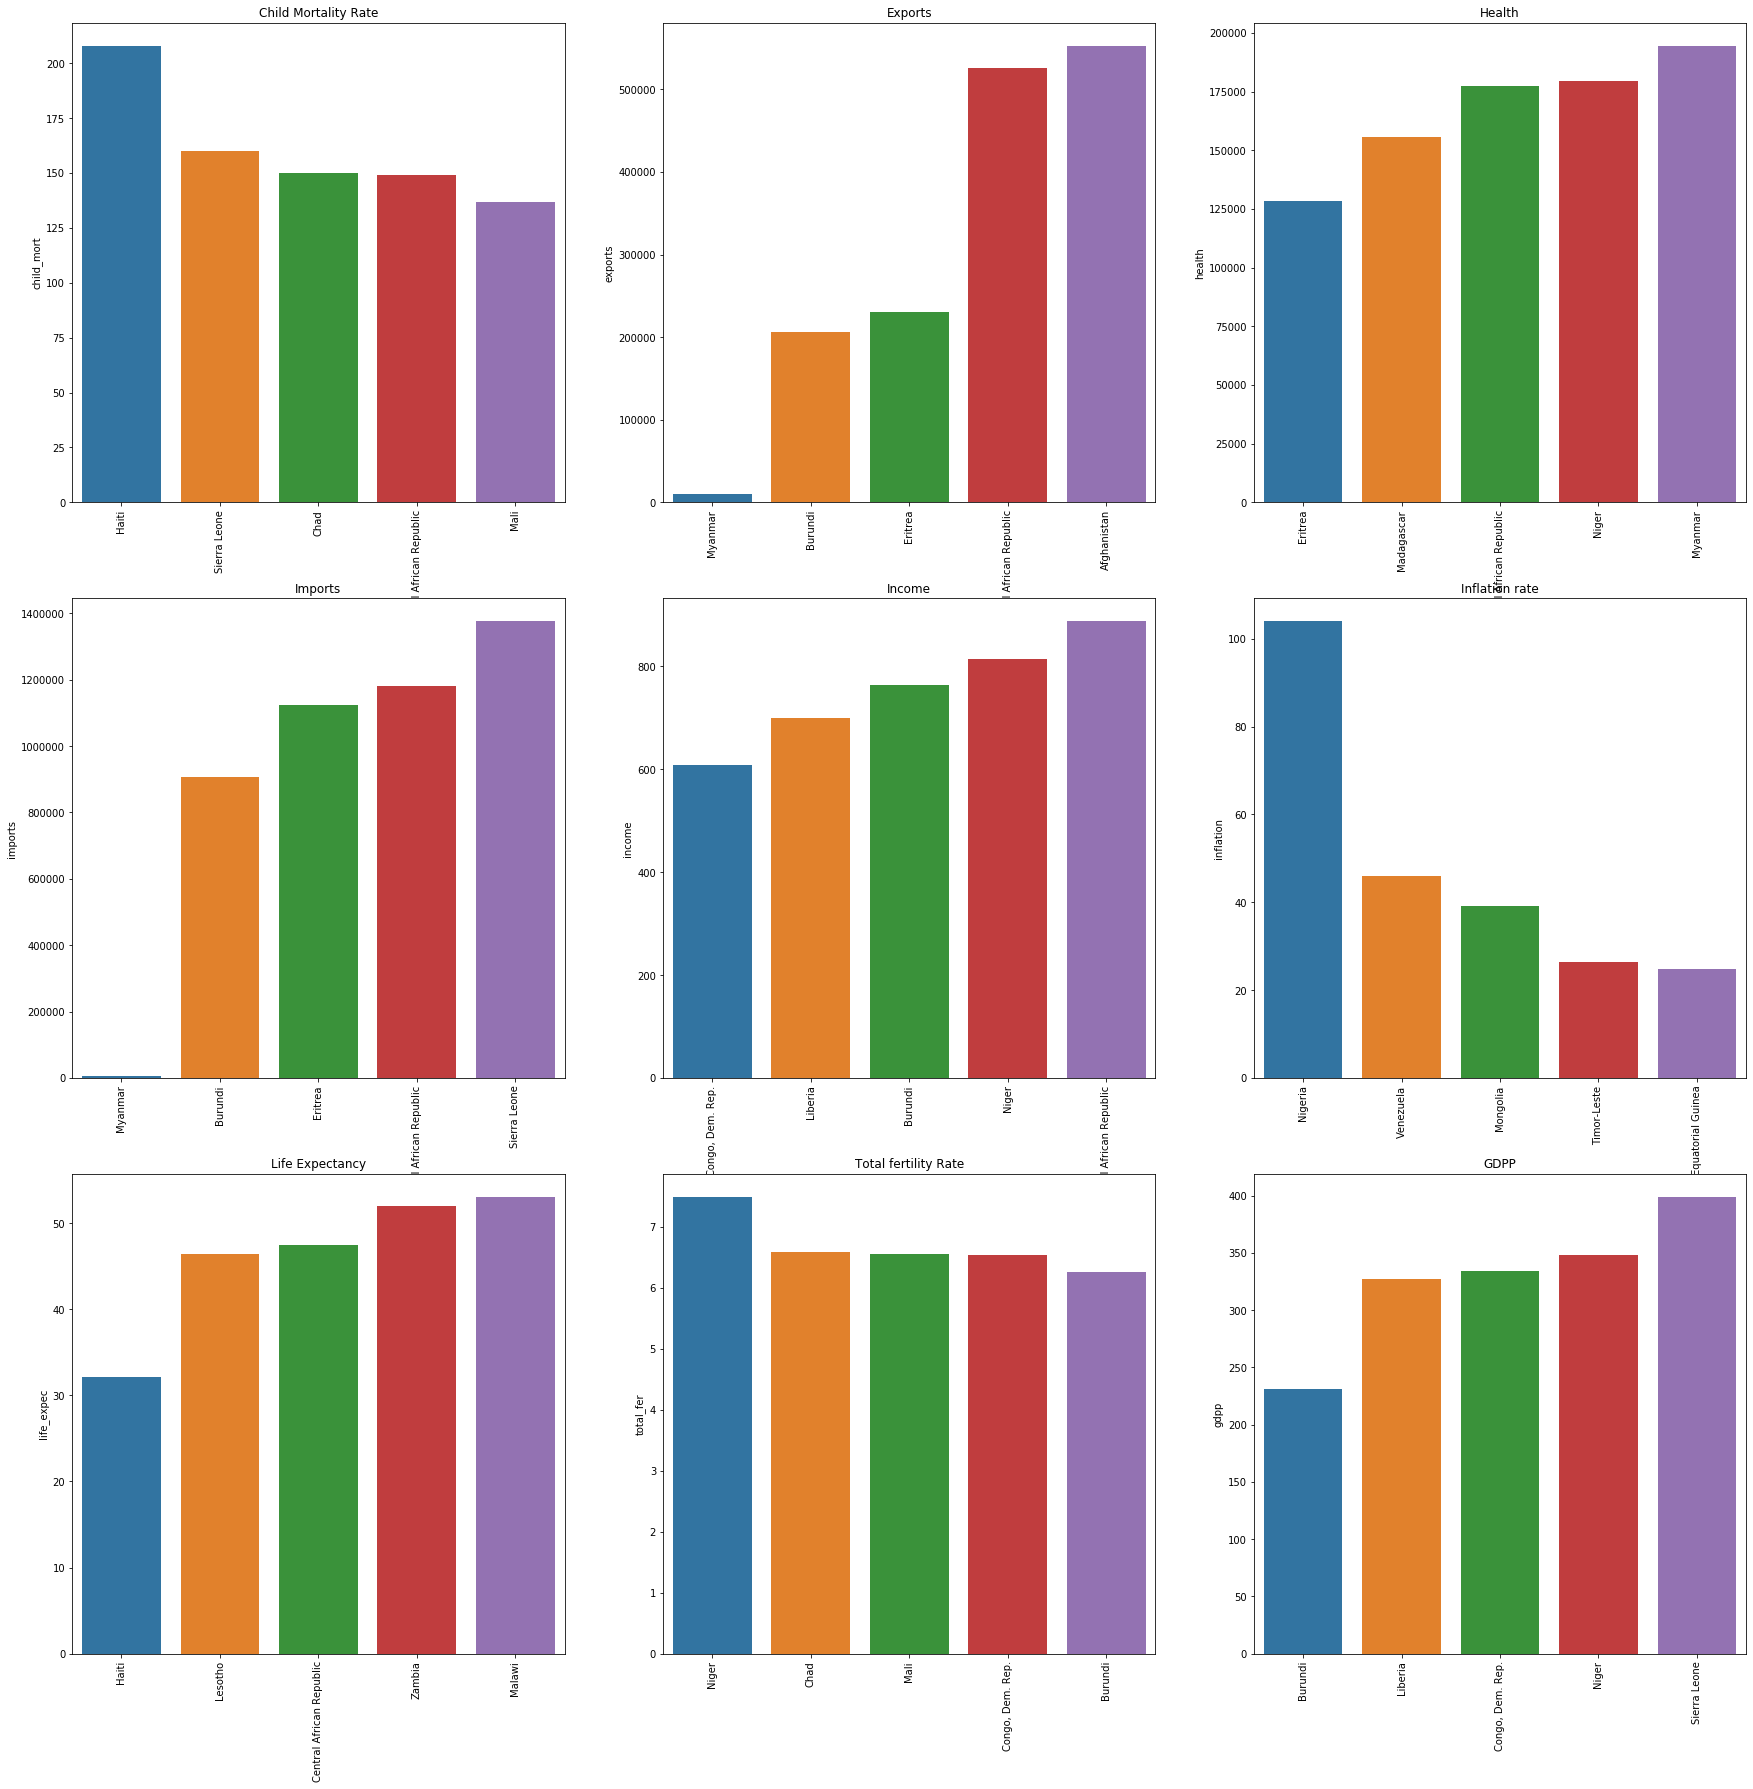

In [10]:
fig , axs = plt.subplots( 3, 3, figsize = (30,30))

ax = sns.barplot( x = 'country' , y = 'child_mort' , data = country_child_mort , ax =axs[0,0])
ax.set (xlabel ='' , title = 'Child Mortality Rate')

ax = sns.barplot( x = 'country' , y = 'exports' , data = country_exports , ax =axs[0,1])
ax.set (xlabel ='' , title = 'Exports')

ax = sns.barplot( x = 'country' , y = 'health' , data = country_health , ax =axs[0,2])
ax.set (xlabel ='' , title = 'Health')

ax = sns.barplot( x = 'country' , y = 'imports' , data = country_imports , ax =axs[1,0])
ax.set (xlabel ='' , title = 'Imports')

ax = sns.barplot( x = 'country' , y = 'income' , data = country_income , ax =axs[1,1])
ax.set (xlabel ='' , title = 'Income')

ax = sns.barplot( x = 'country' , y = 'inflation' , data = country_inflation , ax =axs[1,2])
ax.set (xlabel ='' , title = 'Inflation rate')

ax = sns.barplot( x = 'country' , y = 'life_expec' , data = country_life_expec , ax =axs[2,0])
ax.set (xlabel ='' , title = 'Life Expectancy')

ax = sns.barplot( x = 'country' , y = 'total_fer' , data = country_total_fer , ax =axs[2,1])
ax.set (xlabel ='' , title = 'Total fertility Rate')

ax = sns.barplot( x = 'country' , y = 'gdpp' , data = country_gdpp , ax =axs[2,2])
ax.set (xlabel ='' , title = 'GDPP')


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.show()

- From the above graphs we can obtain the countries which are in need of help based on the parameters individually
 - Myanmar has least export and import services 
 - Democratic Republic of Congo has the least income
 - Burundi has the least GDPP
 - Haiti has highest child mortality rate and the least life expectancy
 - Total fertility rate is highest in Niger
 - Nigeria has the highest Inflation Rate 

## Univariate Analysis via distplot

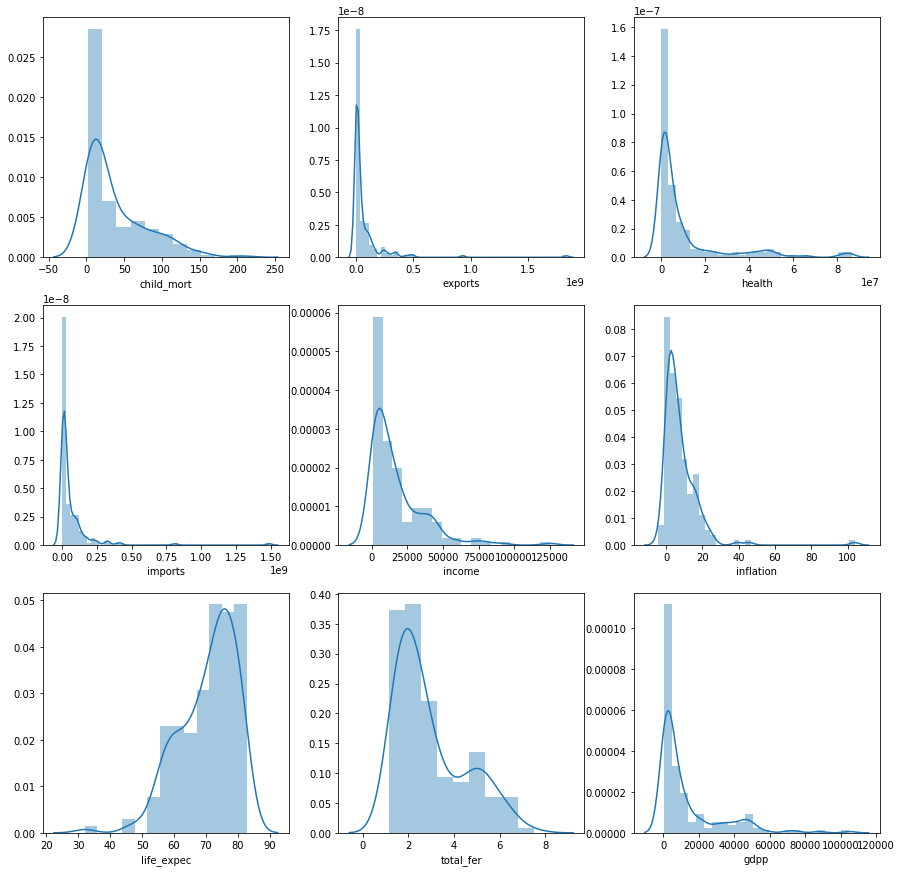

In [11]:
factors = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
plt.figure(figsize =(15,15))
for i in enumerate(factors):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

- All the factors are left skewed except for the **life_expec**
- All the factors are unimodular in general except for the **total_fer** and **gdpp** which are bimodular (Distinguished two peaks visible) 

## Bivariate Analysis

**Heatmap showing the correlation bewtween the numerical variables/ linearity among the variables**

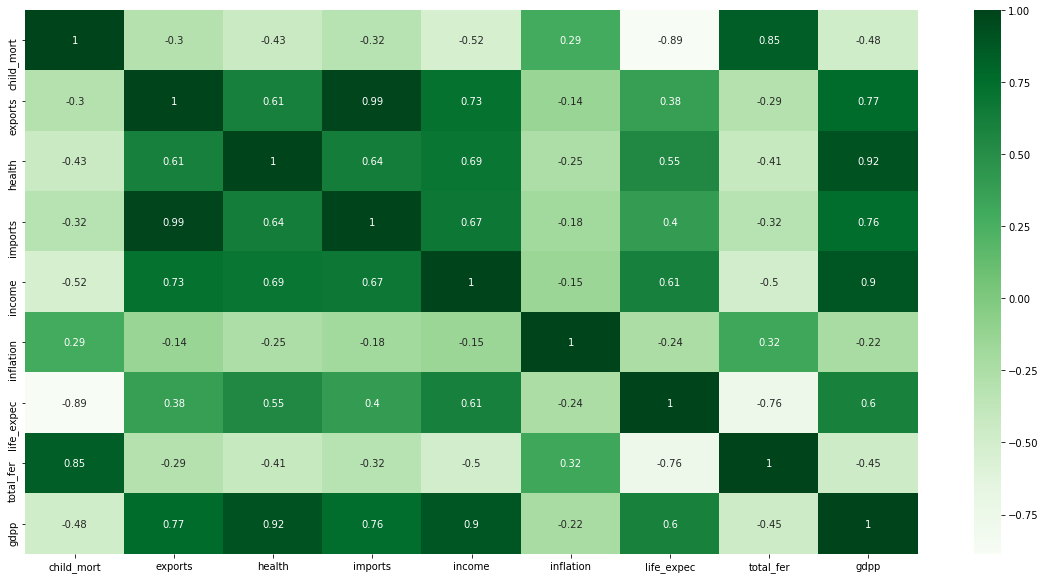

In [12]:
# Finding the correlation between the numeric variables using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr() ,annot=True,cmap="Greens")

- **imports** and **exports** have a high correlation of 0.99
- **child_mort** and **total_fer** have high correlation of 0.85
- **child_mort** and **life_expec** has negative corelation of -0.89
- **life_expec** and **child_mort** has negative corelation of -0.76
- **health**,**income**,**exports** and **imports** have high corelation with **gdpp** respectively

**Pairplot group of scatter plots of all numeric variables in the dataframe**

<Figure size 1440x1440 with 0 Axes>

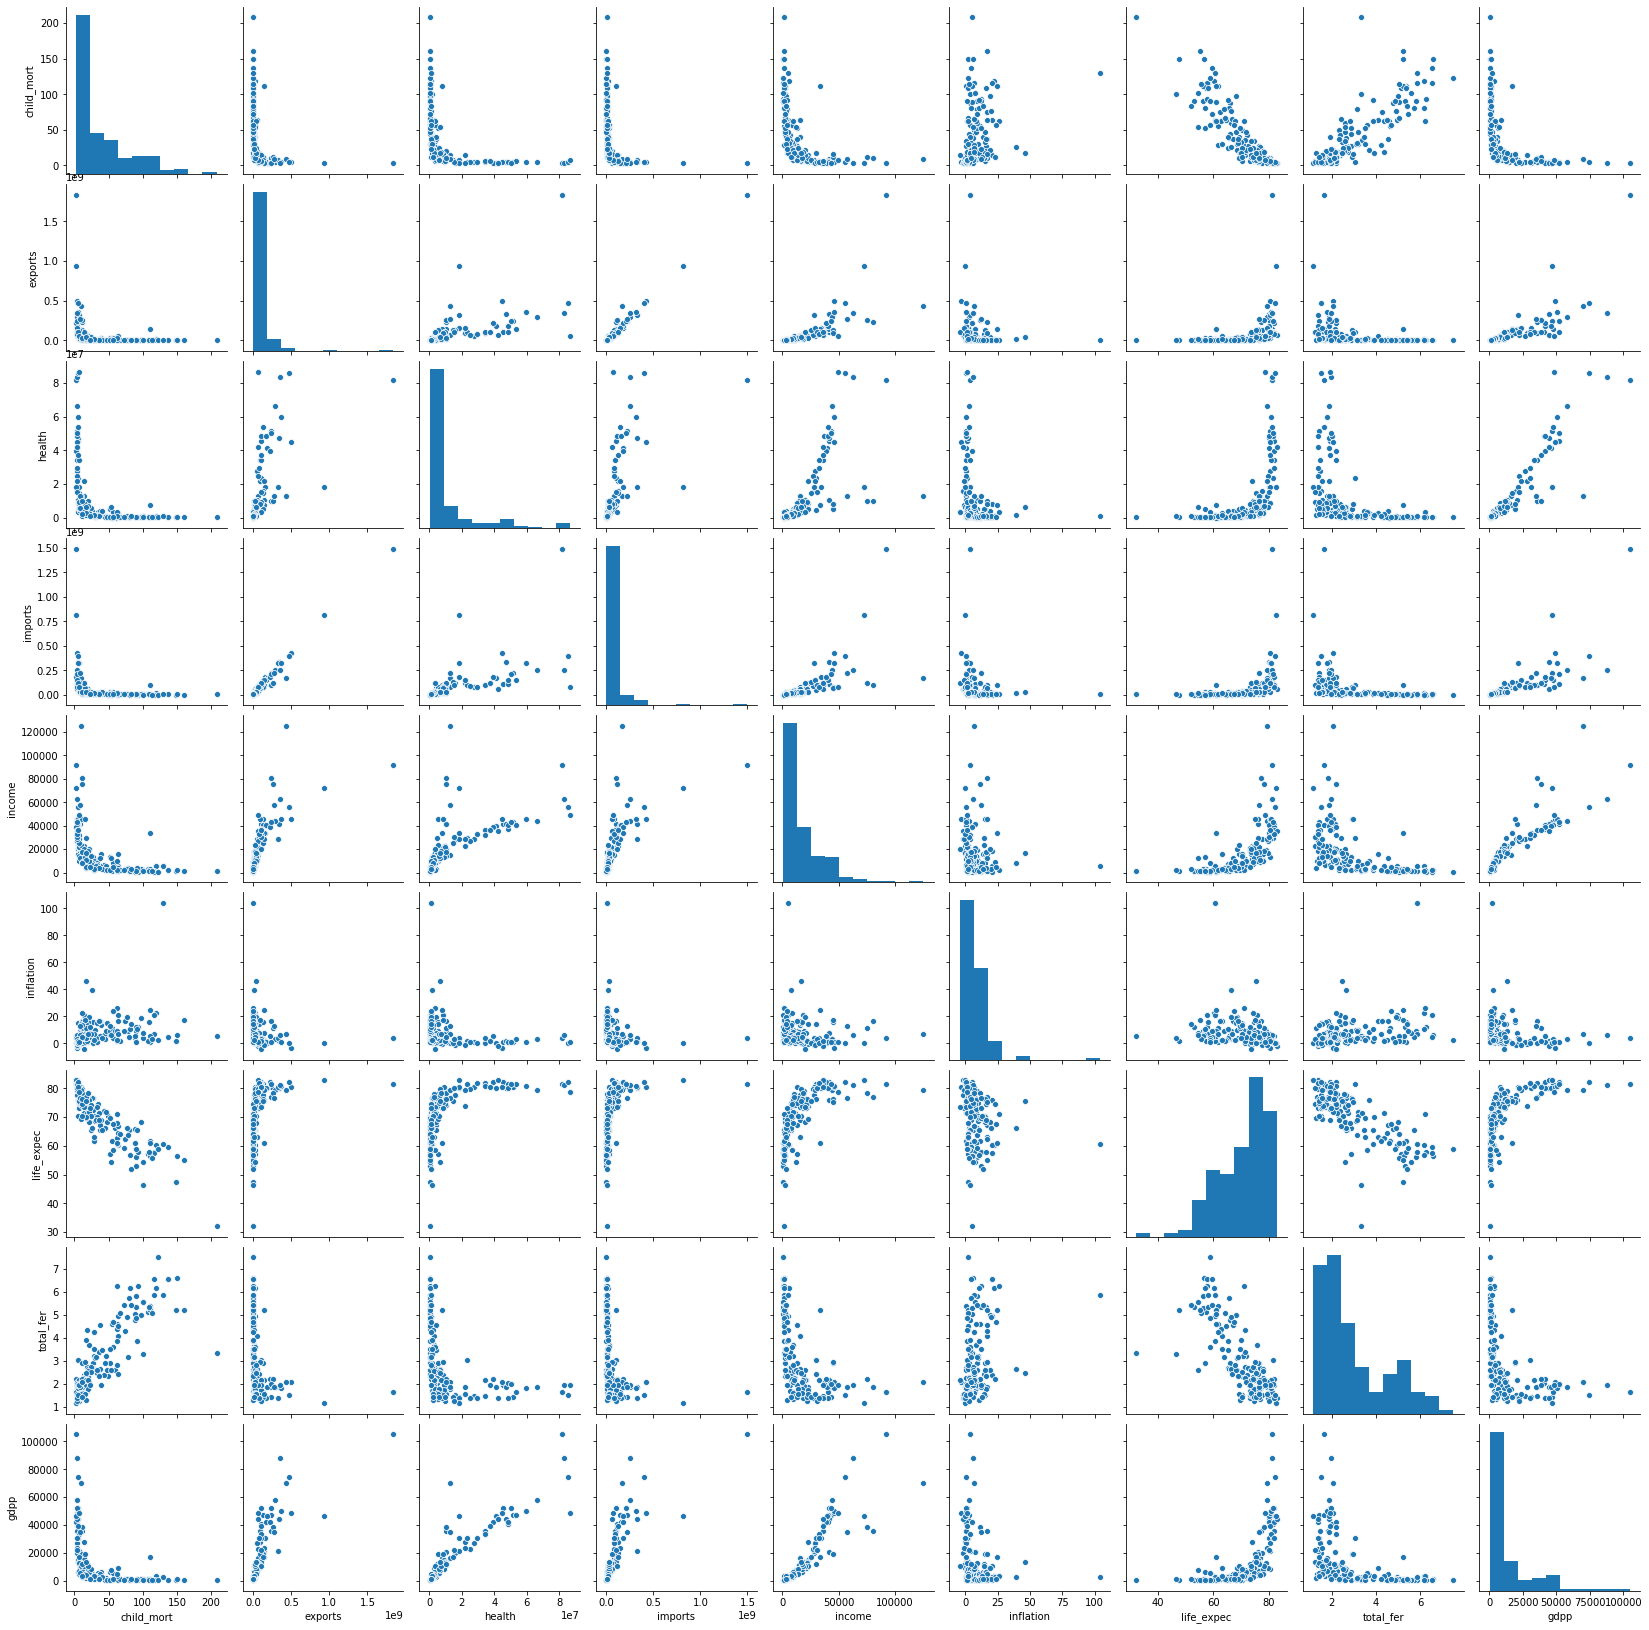

In [13]:
plt.figure(figsize = (20,20))
sns.pairplot(df)
plt.show()

## Outlier Treatment

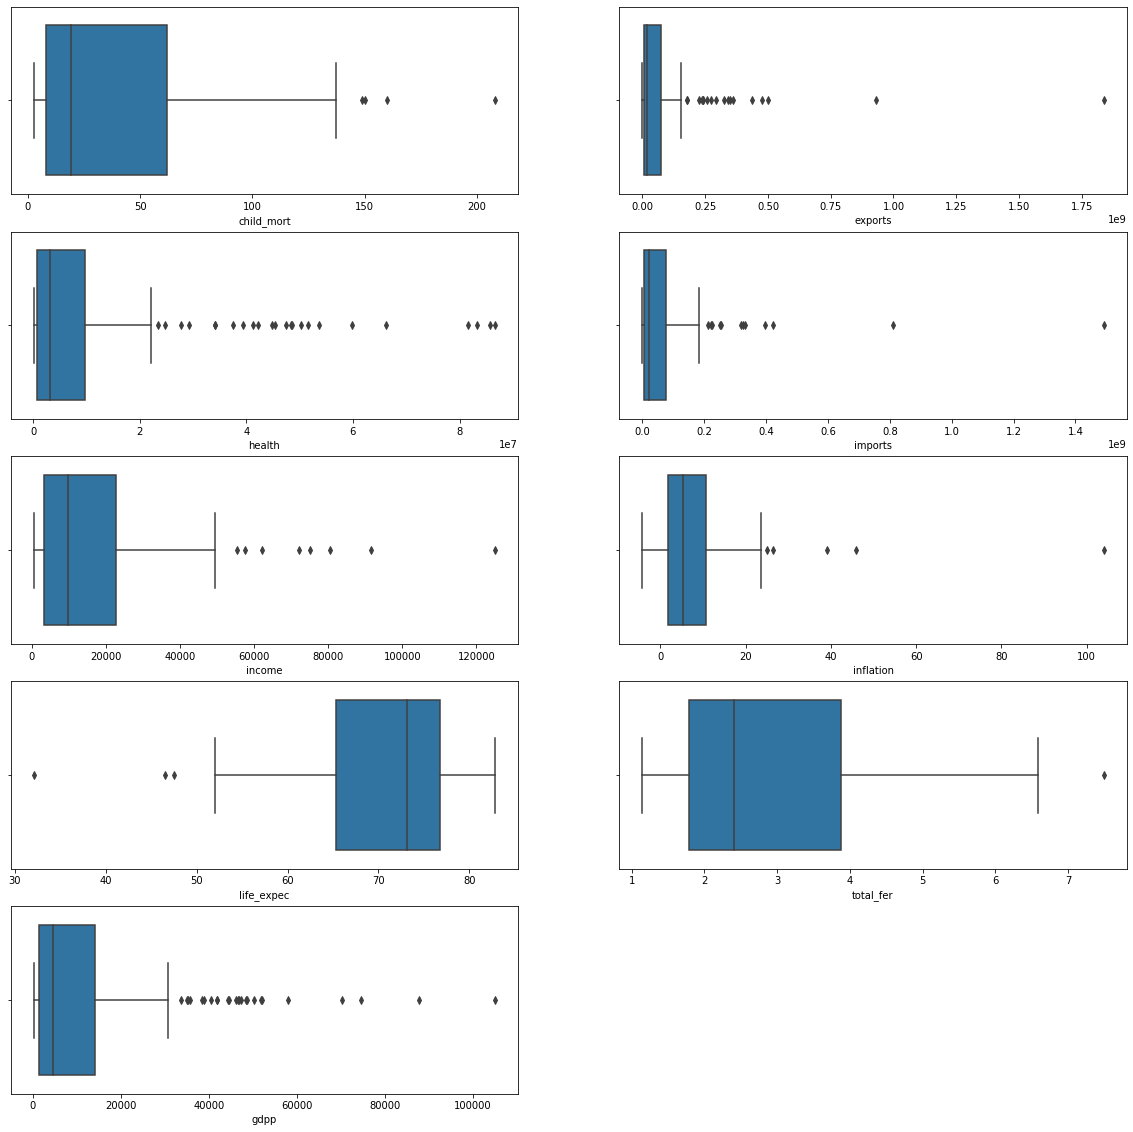

In [14]:
# Check for the ouliers
plt.figure(figsize = (20,20))
for i in enumerate(factors):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(df[i[1]])

- We can find atleast one outlier in all the factors
- There is only one outlier in **total_fer**
- **gdpp** and **health** have too many outliers
- The factors **exports**,**health**,**imports**,**income**,**inflation**,**total_fer**,**gdpp** will be capped according to business needs and moreover all these have higher outliers
- Even though all factors have outliers we dont do outlier treatment for all because we cant treat countries with a single factor that needs aid 
- Higher outliers are not capped for the **child_mort** factor as these countries may be in need of help
- Lower ouliers are not capped for the **life_expec** factr as these countries may be in need of help

In [15]:
# Capping of outliers
cap_factors = ['exports' , 'health' , 'imports' , 'income' , 'inflation' , 'life_expec' , 'gdpp']
for i in cap_factors:
    q1 = df[i].quantile(0.1)
    q4 = df[i].quantile(0.99)
    df[i][df[i] <= q1] = q1
    df[i][df[i] >= q4] = q4

## Hopkins Check

**Hopkins statistic is a way to check the clustering tendency of the dataset. The more the value of Hopskin staistic the 
possibility of performing clustering on the dataset is more**

In [16]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [30]:
hopkins(df.drop('country',axis=1))

0.957961994266288

**Since we have a high hopskin score we can perform clustering on dataset**

## Scaling

In [31]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
df1 = scaler.fit_transform(df.drop('country' ,axis=1))
df1

array([[ 1.29153238, -0.56528859, -0.56778557, ..., -1.6947357 ,
         1.90288227, -0.70112603],
       [-0.5389489 , -0.47433111, -0.44117578, ...,  0.67935897,
        -0.85997281, -0.49982447],
       [-0.27283273, -0.42446236, -0.48706966, ...,  0.70505264,
        -0.0384044 , -0.47852089],
       ...,
       [-0.37231541, -0.49208362, -0.54106792, ...,  0.26826033,
        -0.66120626, -0.65988921],
       [ 0.44841668, -0.54043725, -0.55325168, ..., -0.4511623 ,
         1.14094382, -0.65988921],
       [ 1.11495062, -0.52750076, -0.54309052, ..., -1.6947357 ,
         1.6246091 , -0.65125263]])

In [33]:
df1 = pd.DataFrame(df1 , columns = df.columns[1:])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.565289,-0.567786,-0.599599,-0.855572,0.253867,-1.694736,1.902882,-0.701126
1,-0.538949,-0.474331,-0.441176,-0.414372,-0.389940,-0.393759,0.679359,-0.859973,-0.499824
2,-0.272833,-0.424462,-0.487070,-0.476911,-0.223723,1.125218,0.705053,-0.038404,-0.478521
3,2.007808,-0.381703,-0.534904,-0.464779,-0.615481,1.949469,-1.401828,2.128151,-0.532068
4,-0.695634,-0.087133,-0.179098,0.139152,0.123263,-0.792801,0.743593,-0.541946,-0.032873


In [34]:
df1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,-2.459776e-17,3.523462e-17,-1.123519e-16,9.972063e-17,1.402737e-16,4.081898e-16,3.124580e-16,2.326815e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-5.652886e-01,-5.708194e-01,-6.035702e-01,-8.603851e-01,-9.042976e-01,-1.694736e+00,-1.191250e+00,-7.011260e-01
25%,-7.466190e-01,-5.356792e-01,-5.472693e-01,-5.578651e-01,-7.579125e-01,-7.443929e-01,-7.337926e-01,-7.639023e-01,-6.587377e-01
50%,-4.717981e-01,-4.187675e-01,-4.109259e-01,-4.082126e-01,-3.882611e-01,-2.760090e-01,2.682603e-01,-3.564309e-01,-4.670054e-01
75%,5.926666e-01,6.464223e-02,-4.391499e-02,1.959946e-01,3.303346e-01,4.252585e-01,7.435931e-01,6.175252e-01,7.364488e-02
max,4.221297e+00,5.119386e+00,4.120834e+00,5.270272e+00,3.776348e+00,4.445510e+00,1.459162e+00,3.009349e+00,3.818354e+00


## Clustering

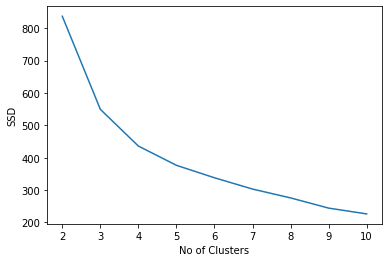

In [35]:
#Elbow Curve
from sklearn.cluster import KMeans
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([ k ,kmean.inertia_])

temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])
plt.xlabel('No of Clusters')
plt.ylabel('SSD')
plt.show()

For n_clusters=2, the silhouette score is 0.4710679374707147
For n_clusters=3, the silhouette score is 0.405275245420683
For n_clusters=4, the silhouette score is 0.3940906759249386
For n_clusters=5, the silhouette score is 0.3842568349123653
For n_clusters=6, the silhouette score is 0.3014719061099133
For n_clusters=7, the silhouette score is 0.2963273730397683
For n_clusters=8, the silhouette score is 0.28629061113115345
For n_clusters=9, the silhouette score is 0.309123904734333
For n_clusters=10, the silhouette score is 0.2810134498659215


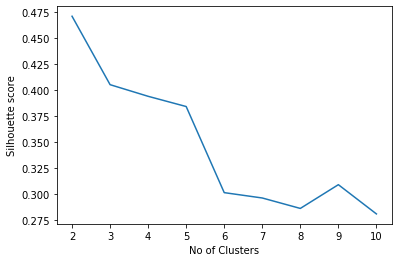

In [36]:
#Silhouette score


from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1 , kmean.labels_)])
    silhouette_avg = silhouette_score( df1 , kmean.labels_)
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))
temp = pd.DataFrame(ss)
plt.plot(temp[0], temp[1])
plt.xlabel('No of Clusters')
plt.ylabel('Silhouette score')
plt.show()

**From silhouette score and sum of sqaured distances we choose the optimal value of k as 3**

## KMeans

In [37]:
kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [38]:
kmean.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [39]:
Klabel  = pd.DataFrame(kmean.labels_, columns= ['Klabel'])
Klabel.head()

,Klabel
0,2
1,0
2,0
3,2
4,0


In [40]:
df_kmean = df.copy()
df_kmean = pd.concat([df_kmean, Klabel], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Klabel
0,Afghanistan,90.2,1102248.0,419174.0,2482970.0,1610.0,9.44,57.82,5.82,593.8,2
1,Albania,16.6,11452000.0,2678950.0,19877400.0,9930.0,4.49,76.30,1.65,4090.0,0
2,Algeria,27.3,17126400.0,1859820.0,14004400.0,12900.0,16.10,76.50,2.89,4460.0,0
3,Angola,119.0,21991900.0,1006050.0,15143700.0,5900.0,22.40,60.10,6.16,3530.0,2
4,Antigua and Barbuda,10.3,55510000.0,7356600.0,71858000.0,19100.0,1.44,76.80,2.13,12200.0,0


In [41]:
df_kmean.Klabel.value_counts()

0    89
2    48
1    30
Name: Klabel, dtype: int64

## Visulaisation of the clusters through scatter plot

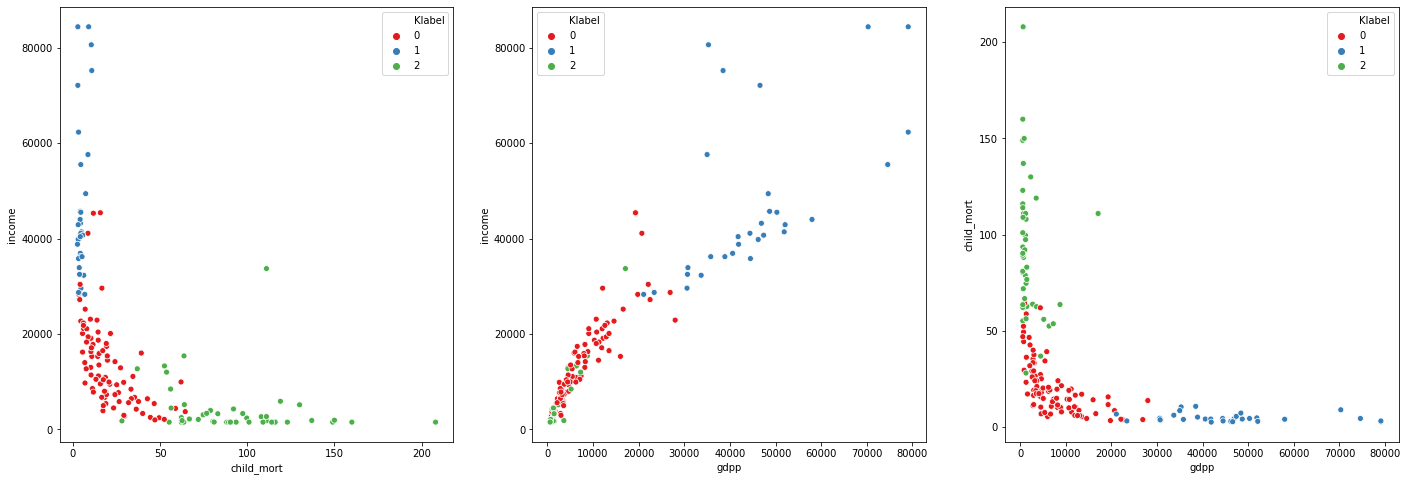

In [42]:
f ,axes = plt.subplots(1,3 , figsize = (24 , 8))
sns.scatterplot( x ='child_mort' , y ='income' , hue = 'Klabel' , data = df_kmean, palette = 'Set1' , ax = axes[0])
sns.scatterplot( x ='gdpp' , y ='income' , hue = 'Klabel' , data = df_kmean , palette = 'Set1' , ax = axes[1])
sns.scatterplot( x ='gdpp' , y ='child_mort' , hue = 'Klabel' , data = df_kmean ,  palette = 'Set1' , ax = axes[2])

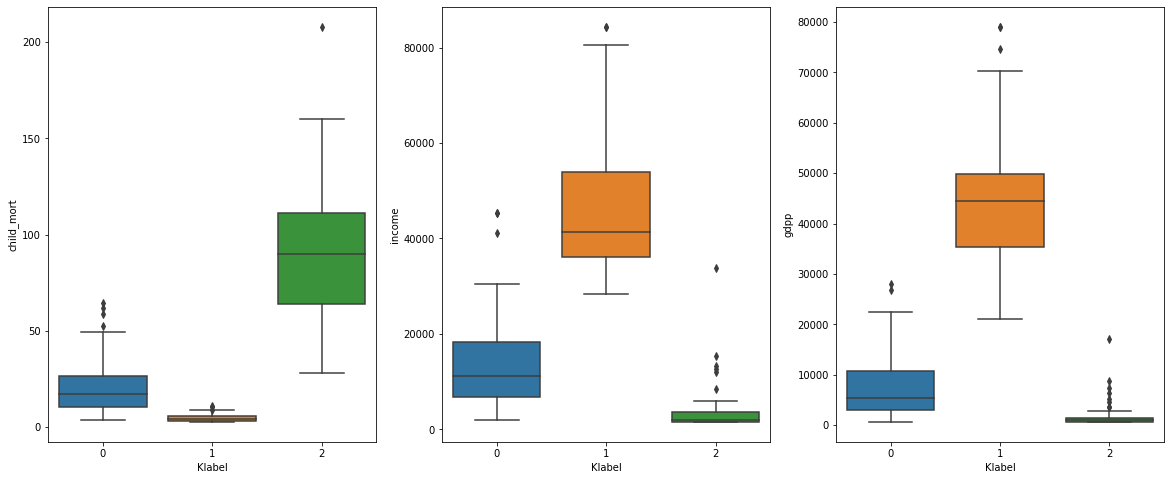

In [43]:
f ,axes = plt.subplots(1,3 , figsize = (20 , 8))
sns.boxplot(x='Klabel', y='child_mort', data=df_kmean, ax = axes[0])
sns.boxplot(x='Klabel', y='income', data=df_kmean , ax = axes[1])
sns.boxplot(x='Klabel', y='gdpp', data=df_kmean , ax = axes[2])

When compared the box plots of all the 3 variables writ to the cluster ids we conclude
- If a country has low child_mort , low income and low gdpp they are developing countries ( Kcluster_id = 0 )
- If a country has low child_mort , high income and high gdpp they are developed countries ( Kcluster_id = 1 )
- If a country has high child_mort , low income and low gdpp they can be considerd under developed countries ( Kcluster_id = 2)

## Cluster Profiling
We consider **child_mort**, **income** and **gdpp** for cluster profiling as mentioned

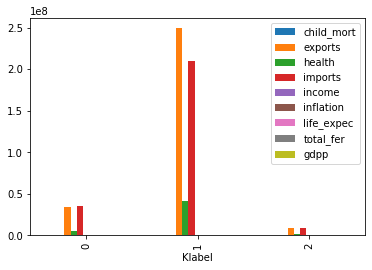

In [44]:
df_kmean.drop('country', axis = 1).groupby('Klabel').mean().plot(kind = 'bar')

In [45]:
df_kmean_prof = df_kmean[['child_mort','income','gdpp','Klabel']]
df_kmean_prof.head()

,child_mort,income,gdpp,Klabel
0,90.2,1610.0,593.8,2
1,16.6,9930.0,4090.0,0
2,27.3,12900.0,4460.0,0
3,119.0,5900.0,3530.0,2
4,10.3,19100.0,12200.0,0


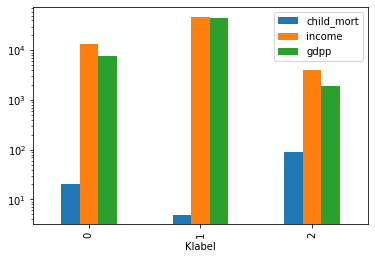

In [46]:
df_kmean_prof.groupby('Klabel').mean().plot(kind = 'bar' ,logy=True) 
# since child_mort values are small compared to other 2 , log scaling is used on y axis

In [47]:
# Filter the data according to the cluster where they have low income and gdpp and high child_mort i.e label = 2
df_kmean[df_kmean['Klabel'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Klabel
0,Afghanistan,90.2,1102248.0,419174.0,2482970.0,1610.0,9.440,57.82,5.82,593.8,2
3,Angola,119.0,21991900.0,1006050.0,15143700.0,5900.0,22.400,60.10,6.16,3530.0,2
17,Benin,111.0,1804040.0,365025.6,2819760.0,1820.0,0.885,61.80,5.36,758.0,2
21,Botswana,52.5,27686000.0,5270500.0,32575500.0,13300.0,8.920,57.82,2.88,6350.0,2
25,Burkina Faso,116.0,1104000.0,387550.0,2110056.0,1524.0,6.810,57.90,5.87,593.8,2
26,Burundi,93.6,1102248.0,365025.6,2110056.0,1524.0,12.300,57.82,6.26,593.8,2
28,Cameroon,108.0,2908200.0,672030.0,3537000.0,2660.0,1.910,57.82,5.11,1310.0,2
31,Central African Republic,149.0,1102248.0,365025.6,2110056.0,1524.0,2.010,57.82,5.21,593.8,2
32,Chad,150.0,3300960.0,406341.0,3901950.0,1930.0,6.390,57.82,6.59,897.0,2
36,Comoros,88.2,1268850.0,365025.6,3975730.0,1524.0,3.870,65.90,4.75,769.0,2


In [48]:
df_kmean[df_kmean['Klabel'] == 2].sort_values(by = ['income','gdpp','child_mort'], ascending = [True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Klabel
132,Sierra Leone,160.0,1102248.0,522690.0,2110056.0,1524.0,17.20,57.82,5.20,593.8,2
31,Central African Republic,149.0,1102248.0,365025.6,2110056.0,1524.0,2.01,57.82,5.21,593.8,2
112,Niger,123.0,1102248.0,365025.6,2110056.0,1524.0,2.55,58.80,7.49,593.8,2
25,Burkina Faso,116.0,1104000.0,387550.0,2110056.0,1524.0,6.81,57.90,5.87,593.8,2
37,"Congo, Dem. Rep.",116.0,1372740.0,365025.6,2110056.0,1524.0,20.80,57.82,6.54,593.8,2


## Hierarchial Clustering

In [49]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.565289,-0.567786,-0.599599,-0.855572,0.253867,-1.694736,1.902882,-0.701126
1,-0.538949,-0.474331,-0.441176,-0.414372,-0.389940,-0.393759,0.679359,-0.859973,-0.499824
2,-0.272833,-0.424462,-0.487070,-0.476911,-0.223723,1.125218,0.705053,-0.038404,-0.478521
3,2.007808,-0.381703,-0.534904,-0.464779,-0.615481,1.949469,-1.401828,2.128151,-0.532068
4,-0.695634,-0.087133,-0.179098,0.139152,0.123263,-0.792801,0.743593,-0.541946,-0.032873


In [50]:
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Klabel
0,Afghanistan,90.2,1102248.0,419174.0,2482970.0,1610.0,9.44,57.82,5.82,593.8,2
1,Albania,16.6,11452000.0,2678950.0,19877400.0,9930.0,4.49,76.30,1.65,4090.0,0
2,Algeria,27.3,17126400.0,1859820.0,14004400.0,12900.0,16.10,76.50,2.89,4460.0,0
3,Angola,119.0,21991900.0,1006050.0,15143700.0,5900.0,22.40,60.10,6.16,3530.0,2
4,Antigua and Barbuda,10.3,55510000.0,7356600.0,71858000.0,19100.0,1.44,76.80,2.13,12200.0,0


### Single Linkage

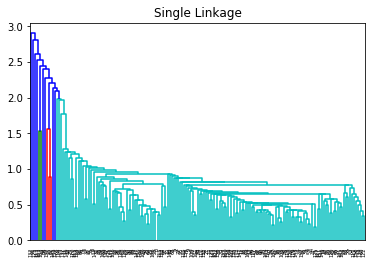

In [51]:
import scipy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

single_link = linkage( df1 , method = 'single' , metric = 'euclidean')
dendrogram(single_link)
plt.title('Single Linkage')
plt.show()

### Complete linkage

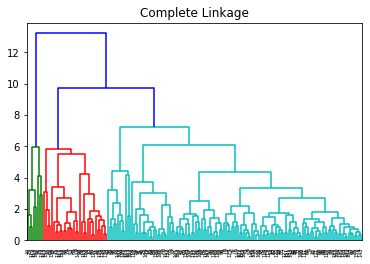

In [52]:
complete_link = linkage( df1 , method = 'complete' , metric = 'euclidean')
dendrogram(complete_link)
plt.title('Complete Linkage')
plt.show()

- From the above linkages we see that the complte linkage provides a well structured view/tree like structure compared to single linkage

In [53]:
Hlabel = cut_tree(complete_link , n_clusters = 3 ).reshape(-1)
Hlabel

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [54]:
Hlabel  = pd.DataFrame(Hlabel, columns= ['Hlabel'])

In [55]:
df_kmean = pd.concat([df_kmean, Hlabel], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Klabel,Hlabel
0,Afghanistan,90.2,1102248.0,419174.0,2482970.0,1610.0,9.44,57.82,5.82,593.8,2,0
1,Albania,16.6,11452000.0,2678950.0,19877400.0,9930.0,4.49,76.30,1.65,4090.0,0,0
2,Algeria,27.3,17126400.0,1859820.0,14004400.0,12900.0,16.10,76.50,2.89,4460.0,0,0
3,Angola,119.0,21991900.0,1006050.0,15143700.0,5900.0,22.40,60.10,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,55510000.0,7356600.0,71858000.0,19100.0,1.44,76.80,2.13,12200.0,0,0


In [56]:
df_kmean.Hlabel.value_counts()

0    127
1     32
2      8
Name: Hlabel, dtype: int64

## Visulaisation of the clusters through scatter plot

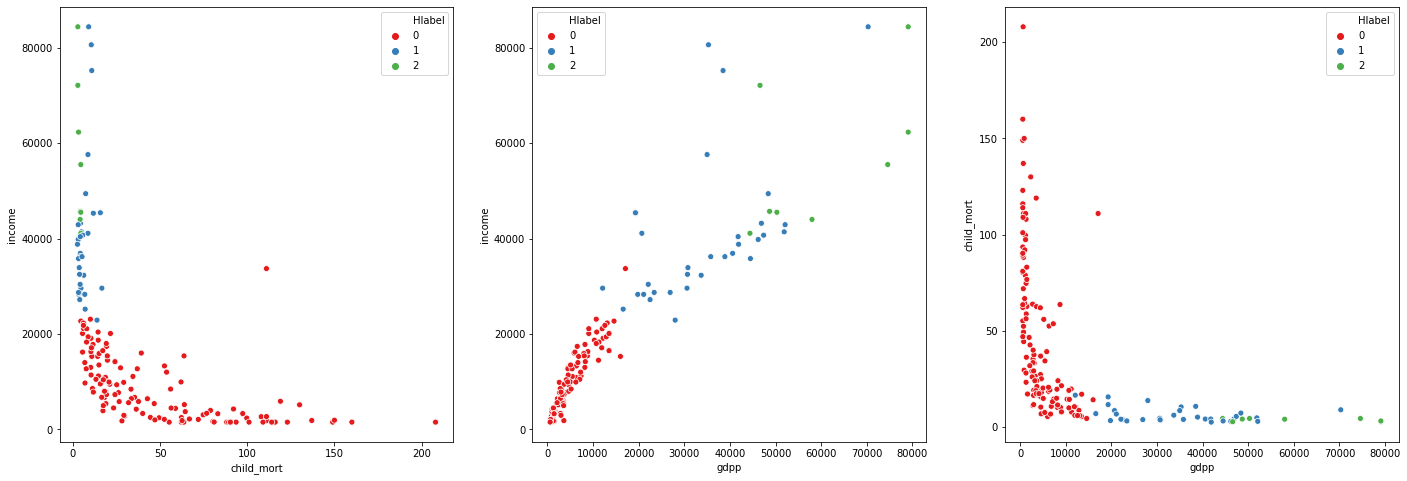

In [57]:
f ,axes = plt.subplots(1,3 , figsize = (24 , 8))
sns.scatterplot( x ='child_mort' , y ='income' , hue = 'Hlabel' , data = df_kmean, palette = 'Set1' , ax = axes[0])
sns.scatterplot( x ='gdpp' , y ='income' , hue = 'Hlabel' , data = df_kmean , palette = 'Set1' , ax = axes[1])
sns.scatterplot( x ='gdpp' , y ='child_mort' , hue = 'Hlabel' , data = df_kmean ,  palette = 'Set1' , ax = axes[2])

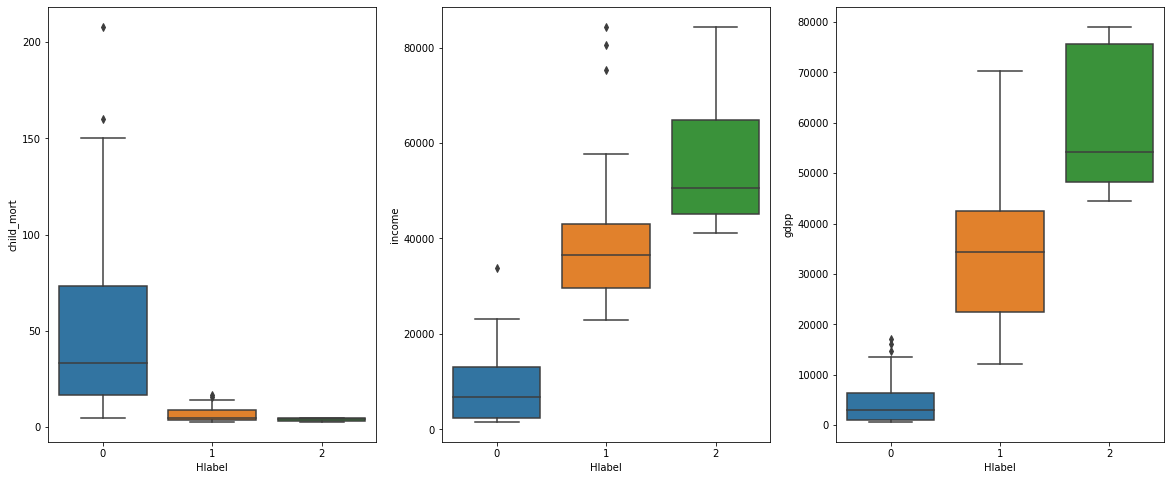

In [58]:
f ,axes = plt.subplots(1,3 , figsize = (20 , 8))
sns.boxplot(x='Hlabel', y='child_mort', data=df_kmean, ax = axes[0])
sns.boxplot(x='Hlabel', y='income', data=df_kmean , ax = axes[1])
sns.boxplot(x='Hlabel', y='gdpp', data=df_kmean , ax = axes[2])

- In hierarchial clustering we are not able to distinguish clusters as we did in Kmeans clustering , as there is a notable variation in cluster size.

## Cluster Profiling
We consider **child_mort**, **income** and **gdpp** for cluster profiling as mentioned

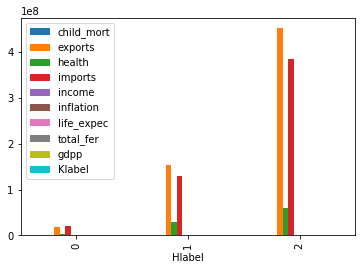

In [59]:
df_kmean.drop('country', axis = 1).groupby('Hlabel').mean().plot(kind = 'bar')

In [60]:
df_hclus_prof = df_kmean[['child_mort','income','gdpp','Hlabel']]
df_hclus_prof.head()

,child_mort,income,gdpp,Hlabel
0,90.2,1610.0,593.8,0
1,16.6,9930.0,4090.0,0
2,27.3,12900.0,4460.0,0
3,119.0,5900.0,3530.0,0
4,10.3,19100.0,12200.0,0


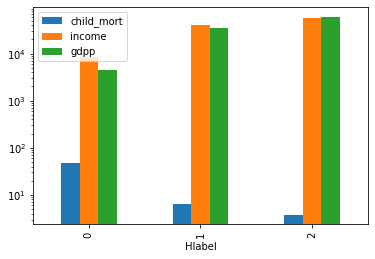

In [61]:
df_hclus_prof.groupby('Hlabel').mean().plot(kind = 'bar' ,logy=True) 

- From the above bar graph we can conclude that
 - For clusters 1 and 2 there is almost same income and gdpp where as child_mort rate is higher for cluster 1 than  cluster 2
 - For cluster 0 teh child mortality is teh highest and the gdp and income is lowest compared to cluster 1 and cluster 2.So we
   can go ahead with cluster 0 which shows High Child mortality and less income and less gdp - under developed countries

In [62]:
df_kmean[df_kmean['Hlabel'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Klabel,Hlabel
0,Afghanistan,90.2,1102248.0,419174.0,2482970.0,1610.0,9.440,57.82,5.82,593.8,2,0
1,Albania,16.6,11452000.0,2678950.0,19877400.0,9930.0,4.490,76.30,1.65,4090.0,0,0
2,Algeria,27.3,17126400.0,1859820.0,14004400.0,12900.0,16.100,76.50,2.89,4460.0,0,0
3,Angola,119.0,21991900.0,1006050.0,15143700.0,5900.0,22.400,60.10,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,55510000.0,7356600.0,71858000.0,19100.0,1.440,76.80,2.13,12200.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,13840200.0,1559250.0,15651900.0,2950.0,2.620,63.00,3.50,2970.0,0,0
163,Venezuela,17.1,38475000.0,6628500.0,23760000.0,16500.0,41.478,75.40,2.47,13500.0,0,0
164,Vietnam,23.3,9432000.0,896040.0,10506200.0,4490.0,12.100,73.10,1.95,1310.0,0,0
165,Yemen,56.3,3930000.0,678580.0,4506400.0,4480.0,23.600,67.50,4.67,1310.0,2,0


In [63]:
df_kmean[df_kmean['Hlabel'] == 0].sort_values(by = ['income','gdpp','child_mort'], ascending = [True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Klabel,Hlabel
132,Sierra Leone,160.0,1102248.0,522690.0,2110056.0,1524.0,17.20,57.82,5.20,593.8,2,0
31,Central African Republic,149.0,1102248.0,365025.6,2110056.0,1524.0,2.01,57.82,5.21,593.8,2,0
112,Niger,123.0,1102248.0,365025.6,2110056.0,1524.0,2.55,58.80,7.49,593.8,2,0
25,Burkina Faso,116.0,1104000.0,387550.0,2110056.0,1524.0,6.81,57.90,5.87,593.8,2,0
37,"Congo, Dem. Rep.",116.0,1372740.0,365025.6,2110056.0,1524.0,20.80,57.82,6.54,593.8,2,0


## Conclusion

- After performing both Kmeans and heirarchial clustering methods , we have 3 clusters which are grouped from  various socio-economic snd health factors , they are
    - Under developed countries
    - Developing Countries
    - Developed Countries
  
- Among the three we suggest to provide teh aid for the under developed countries where gdp and income of teh countries is lower than the otehr countries but the child mortality rate is very high.
- The Top 5 countries which get into under developed countries category and are in dire need of help are
  - **Sierra Leone**
  - **Central African Republic**
  - **Niger**
  - **Burkina Faso**
  - **Congo, Dem. Rep**